In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import random
from datetime import datetime, timedelta

In [34]:
# Simulate dataset again
num_rows = 1000
# Gerar dados fictícios com todas as colunas incluídas
data = {
    "nrro_exter": [f"2023{random.randint(100000, 999999)}" for _ in range(num_rows)],
    "rprot_seq_manif": [f"{random.randint(30000000, 40000000)}/001" for _ in range(num_rows)],
    "dabert_prot": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)],
    "habert_prot": [f"{random.randint(0, 23):02}:{random.randint(0, 59):02}:{random.randint(0, 59):02}" for _ in range(num_rows)],
    "dabert_manif": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)],
    "habert_manif": [f"{random.randint(0, 23):02}:{random.randint(0, 59):02}:{random.randint(0, 59):02}" for _ in range(num_rows)],
    "dtcfoto_quvdr": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)],
    "hcfoto_quvdr": [f"{random.randint(0, 23):02}:{random.randint(0, 59):02}:{random.randint(0, 59):02}" for _ in range(num_rows)],
    "ncli": [f"Client {random.randint(1, 1000)}" for _ in range(num_rows)],
    "cpfj_cnpj_compl": [str(random.randint(10000000000, 99999999999)) for _ in range(num_rows)],
    "rtipo_passo_fis_jurid": [random.choice(["PF", "PJ"]) for _ in range(num_rows)],
    "eval_entre": [random.choice([0, 1]) for _ in range(num_rows)],
    "etpo_manif": [random.randint(1, 5) for _ in range(num_rows)],
    "cgrp_faml_prott": [random.randint(100, 500) for _ in range(num_rows)],
    "cgrp_prott_serve": [random.randint(100, 500) for _ in range(num_rows)],
    "cassnt_proti": [random.randint(1, 10000) for _ in range(num_rows)],
    "ccausa": [random.randint(1, 100) for _ in range(num_rows)],
    "call_sftus": [random.randint(1, 500) for _ in range(num_rows)],
    "csit_situs_manif": [random.randint(1, 3) for _ in range(num_rows)],
    "csit_motvo": [random.randint(1, 60) for _ in range(num_rows)],
    "norigc_canal": [random.randint(1, 5) for _ in range(num_rows)],
    "nprot_bacen": [f"{random.randint(30000000, 40000000)}" for _ in range(num_rows)],
    "nprot_manif": [f"{random.randint(30000000, 40000000)}" for _ in range(num_rows)],
    "cjunce": [random.choice(["DRC", "VAREJO", "DIGIO"]) for _ in range(num_rows)],
    "isgrnto": [random.choice(["Garantia", "Sem Garantia"]) for _ in range(num_rows)],
    "imotvo_manif": [random.choice(["Restrição Cadastral", "Conta - Débito", "PIX - Solicitação de Devolução", "SCR"]) for _ in range(num_rows)],
    "isit_manif": [random.choice(["Encerrada - Regulação Improcedente", "Encerrada - Regulação Procedente"]) for _ in range(num_rows)],
    "inome_cli": [f"Client Name {random.randint(1, 1000)}" for _ in range(num_rows)],
    "icpf_cnpj": [str(random.randint(10000000000, 99999999999)) for _ in range(num_rows)],
    "ifaml_grp": [random.choice(["Conta", "Cartão", "Empréstimos e Financiamento", "PIX - Pagamento Instantâneo"]) for _ in range(num_rows)],
    "iprodt_serve": [random.choice(["Corrente", "Cartão de Crédito", "Empréstimo Pessoal"]) for _ in range(num_rows)],
    "iassnt_probl": [random.choice(["Problema 1", "Problema 2", "Problema 3"]) for _ in range(num_rows)],
    "dt_ddspdo": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)],
    "dt_dprz_respt": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)],
    "dt_djlvgm": [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365)) for _ in range(num_rows)],
    "classificaso": [random.choice(["Procedente", "Improcedente"]) for _ in range(num_rows)],
    "julgado": [random.choice([0, 1]) for _ in range(num_rows)],
    "intervalo": [random.randint(0, 20) for _ in range(num_rows)],
}
df = pd.DataFrame(data)
df.head()

,nrro_exter,rprot_seq_manif,dabert_prot,habert_prot,dabert_manif,habert_manif,dtcfoto_quvdr,hcfoto_quvdr,ncli,cpfj_cnpj_compl,...,icpf_cnpj,ifaml_grp,iprodt_serve,iassnt_probl,dt_ddspdo,dt_dprz_respt,dt_djlvgm,classificaso,julgado,intervalo
0,2023893968,35635631/001,2023-05-06,02:20:25,2023-03-24,15:09:42,2023-02-12,02:57:48,Client 273,58755832100,...,61196088990,Cartão,Empréstimo Pessoal,Problema 2,2023-03-06,2023-07-06,2023-08-23,Procedente,1,9
1,2023932717,30071572/001,2023-11-29,20:33:30,2023-06-13,10:40:09,2023-01-12,14:25:25,Client 775,21967643463,...,46125349868,Cartão,Cartão de Crédito,Problema 2,2023-05-11,2023-08-01,2023-08-05,Procedente,0,16
2,2023937868,33203303/001,2023-12-28,10:31:08,2023-01-26,18:01:56,2023-06-23,23:27:01,Client 434,84622142411,...,72707866613,Cartão,Cartão de Crédito,Problema 3,2023-09-10,2023-11-30,2023-02-04,Procedente,1,18
3,2023422973,33973261/001,2023-01-17,08:07:03,2023-12-19,04:57:38,2023-10-17,21:11:37,Client 491,44440926665,...,36008755878,PIX - Pagamento Instantâneo,Corrente,Problema 3,2023-10-29,2023-09-24,2023-11-14,Procedente,1,18
4,2023201196,36725987/001,2023-11-17,06:04:24,2023-01-27,07:19:40,2023-10-31,08:47:39,Client 772,31237804786,...,44953506935,Conta,Cartão de Crédito,Problema 1,2023-11-04,2023-09-10,2023-05-28,Procedente,1,8


In [35]:
df.columns

Index(['nrro_exter', 'rprot_seq_manif', 'dabert_prot', 'habert_prot',
       'dabert_manif', 'habert_manif', 'dtcfoto_quvdr', 'hcfoto_quvdr', 'ncli',
       'cpfj_cnpj_compl', 'rtipo_passo_fis_jurid', 'eval_entre', 'etpo_manif',
       'cgrp_faml_prott', 'cgrp_prott_serve', 'cassnt_proti', 'ccausa',
       'call_sftus', 'csit_situs_manif', 'csit_motvo', 'norigc_canal',
       'nprot_bacen', 'nprot_manif', 'cjunce', 'isgrnto', 'imotvo_manif',
       'isit_manif', 'inome_cli', 'icpf_cnpj', 'ifaml_grp', 'iprodt_serve',
       'iassnt_probl', 'dt_ddspdo', 'dt_dprz_respt', 'dt_djlvgm',
       'classificaso', 'julgado', 'intervalo'],
      dtype='object')

In [36]:
df = df.drop(columns=['nrro_exter', 'rprot_seq_manif', 'cpfj_cnpj_compl', 'habert_prot', 'habert_manif', 'hcfoto_quvdr', 'icpf_cnpj'])

In [37]:
# Encoding categorical variables
categorical_columns = ['cjunce', 'isgrnto', 'imotvo_manif', 'isit_manif', 'inome_cli', 'isit_manif', 'ifaml_grp', 'iprodt_serve', 'iassnt_probl', 'ncli', 'rtipo_passo_fis_jurid', 'classificaso']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

label_encoders

{'cjunce': LabelEncoder(),
 'isgrnto': LabelEncoder(),
 'imotvo_manif': LabelEncoder(),
 'isit_manif': LabelEncoder(),
 'inome_cli': LabelEncoder(),
 'ifaml_grp': LabelEncoder(),
 'iprodt_serve': LabelEncoder(),
 'iassnt_probl': LabelEncoder(),
 'ncli': LabelEncoder(),
 'rtipo_passo_fis_jurid': LabelEncoder(),
 'classificaso': LabelEncoder()}

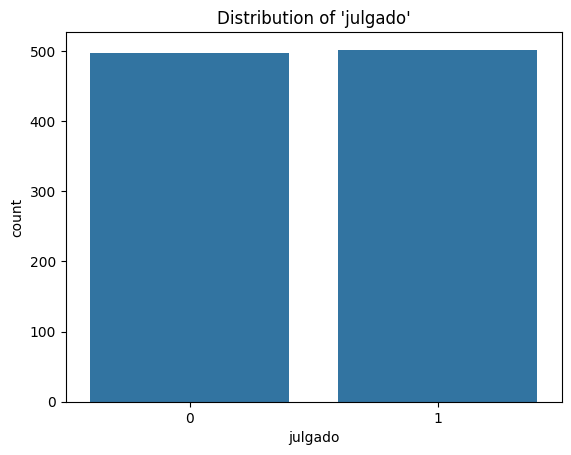

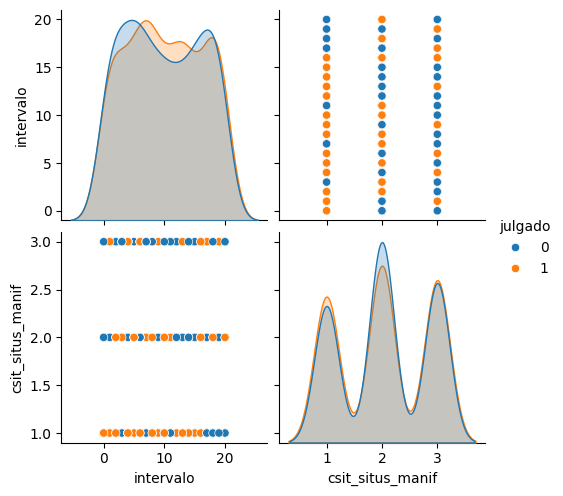

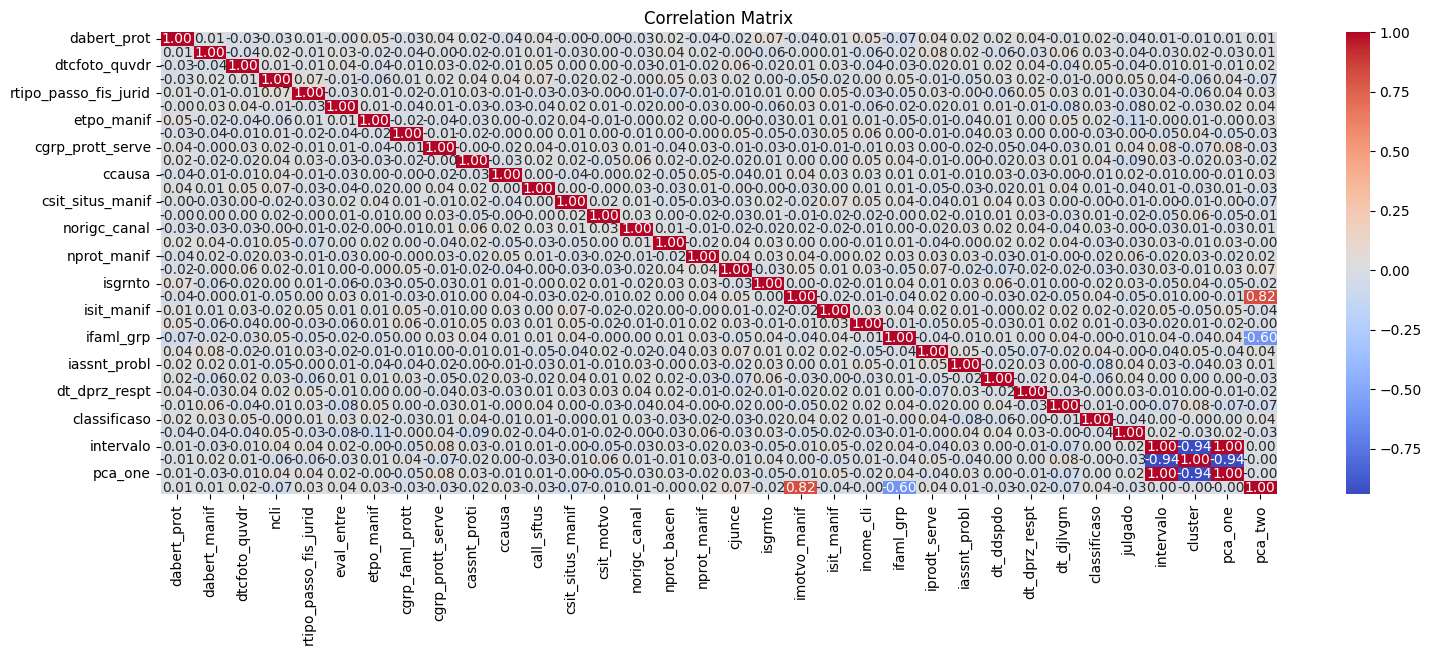

In [45]:
# 1. Exploratory Data Analysis (EDA)
# Distribution of 'julgado'
sns.countplot(x='julgado', data=df)
plt.title("Distribution of 'julgado'")
plt.show()

# Pairplot for numeric variables
numeric_cols = ['intervalo', 'csit_situs_manif']
sns.pairplot(df, vars=numeric_cols, hue='julgado')
plt.show()

# Correlation matrix
plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

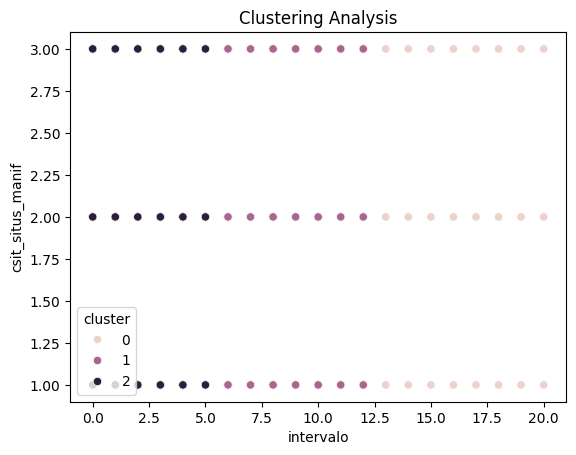

In [40]:
# 2. Clustering
features_for_clustering = ['intervalo', 'csit_situs_manif', 'imotvo_manif', 'ifaml_grp']
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

sns.scatterplot(x='intervalo', y='csit_situs_manif', hue='cluster', data=df)
plt.title("Clustering Analysis")
plt.show()

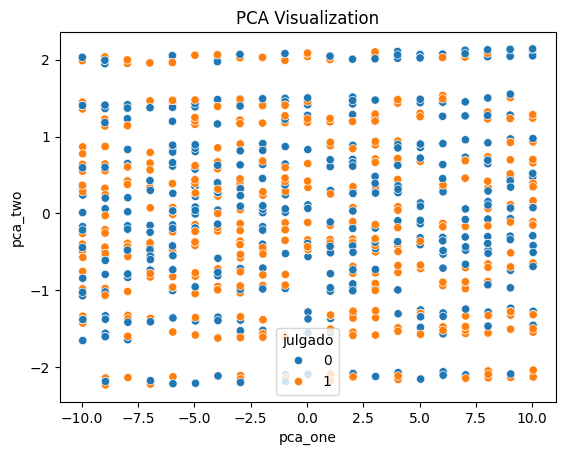

In [41]:
# 3. Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features_for_clustering])
df['pca_one'], df['pca_two'] = pca_result[:, 0], pca_result[:, 1]

sns.scatterplot(x='pca_one', y='pca_two', hue='julgado', data=df)
plt.title("PCA Visualization")
plt.show()

In [43]:
# 4. Supervised Modeling
X = df[['intervalo', 'csit_situs_manif', 'imotvo_manif', 'ifaml_grp', 'classificaso']]
y = df['julgado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

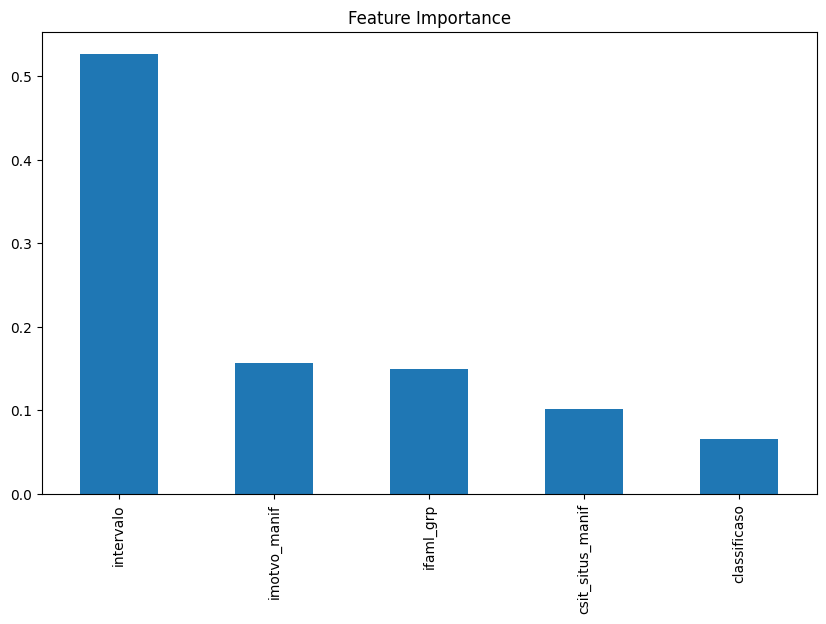

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       150
           1       0.50      0.53      0.51       150

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [47]:
# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title="Feature Importance", figsize=(10, 6))
plt.show()

# Model evaluation
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))